In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

In [20]:
sample_df = pd.read_csv(uci_path)
sample_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# 데이터 자료형
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# 데이터 통계 요약정보
sample_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [22]:
# 분석에 사용할 피처를 카피
copy_df = sample_df.iloc[:,:]
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler
copy_scaler = StandardScaler().fit_transform(copy_df)
copy_scaler

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [11]:
# 군집모혀 학습 및 예측
# 예측결과를 데이터 프레임에 추가

copy_scaler = pd.DataFrame(copy_scaler)
copy_scaler

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [27]:
sample_kmeans = KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10)
sample_kmeans.fit(copy_scaler)

KMeans(n_clusters=6)

In [28]:
# sample_kmean.labels_
copy_df['cluster_id'] = sample_kmeans.labels_
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


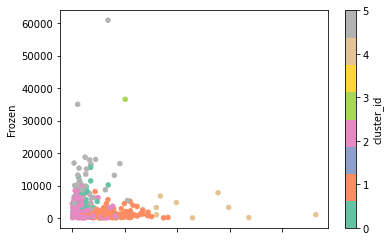

In [29]:
# 시각화
# visualization data point
# plt.scatter(x=copy_df['Grocery'],y=copy_df['Frozen'],c=copy_df['cluster_id'])
# plt.show()
copy_df.plot(kind='scatter',x='Grocery',y='Frozen',c='cluster_id',colorbar=True,cmap='Set2')
plt.show()

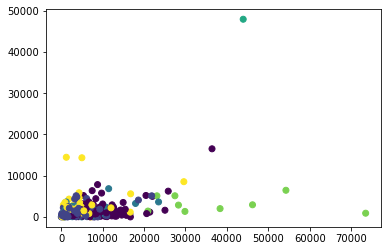

In [25]:
# 시각화
plt.scatter(x=copy_df['Milk'],y=copy_df['Delicassen'],c=copy_df['cluster_id'])
plt.show()

In [31]:
# PCA 차원축소 2
# 군집화 시각화 진행하는 [실습]

from sklearn.decomposition import PCA

copy_pca = PCA(n_components=2)
copy_pca_transform = copy_pca.fit_transform(copy_scaler)


copy_df['pca_x'] = copy_pca_transform[:,0]
copy_df['pca_y'] = copy_pca_transform[:,1]
copy_df.head()



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id,pca_x,pca_y
0,2,3,12669,9656,7561,214,2674,1338,1,0.843939,-0.515351
1,2,3,7057,9810,9568,1762,3293,1776,1,1.062676,-0.484601
2,2,3,6353,8808,7684,2405,3516,7844,1,1.269141,0.682055
3,1,3,13265,1196,4221,6404,507,1788,2,-1.056782,0.610821
4,2,3,22615,5410,7198,3915,1777,5185,1,0.634030,0.974199


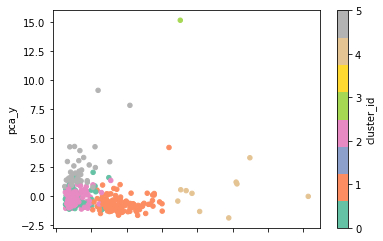

In [32]:
copy_df.plot(kind='scatter',x='pca_x',y='pca_y',c='cluster_id',colorbar=True,cmap='Set2')
plt.show()